In [100]:
import numpy as np
import pandas as pd


In [101]:
#our dataset is not encoded in utf-8 , so used 'encoding = 'latin-1''
df = pd.read_csv('spam.csv', encoding='latin-1')

In [102]:
#taking a look at 5 random rows
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1228,spam,FREE entry into our å£250 weekly comp just sen...,NaN,NaN,NaN
4782,ham,Especially since i talk about boston all up in...,NaN,NaN,NaN
1182,ham,"K give me a sec, breaking a &lt;#&gt; at cstore",NaN,NaN,NaN
4179,ham,"swhrt how u dey,hope ur ok, tot about u 2day.l...",NaN,NaN,NaN
4426,ham,So what did the bank say about the money?,NaN,NaN,NaN


In [103]:
#checking the shape of our data
df.shape

(5572, 5)

In [104]:
# We will follow the structure :
# 1. Data Cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deployement

## 1. Data Cleaning

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Out of total 5572 values, more than 90% of the values in Col 2,3,4 are Null, so we will remove them.

In [106]:
# Dropping the last 3 coloumns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
259,ham,IÛ÷m parked next to a MINI!!!! When are you c...
5460,spam,December only! Had your mobile 11mths+? You ar...
262,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...
2096,ham,I'm done...
3521,ham,Im sorry bout last nite it wasnåÕt ur fault it...


In [107]:
# Instead of v1 and v2 , we will rename the columns for a better understanding
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1735,ham,Why tired what special there you had
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...
4440,ham,I'm going 2 orchard now laready me reaching so...
3306,ham,Set a place for me in your heart and not in yo...
1275,ham,Wot u up 2 u weirdo?


In [108]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [109]:
# We will assign numerical values to our 'target' column , spam ==1 and ham == 0.
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
# Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

No missing values found.


In [111]:
# Checking for duplicate values
df.duplicated().sum()

403

In [112]:
# 403 duplicate values found, dropping the duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [113]:
#No duplicate values remaining.
df.shape

## with this we have finished the cleaning of the data.

(5169, 2)

## 2. Exploratory Data Analysis

In [114]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [115]:
# Checking the count of sms that are ham and spam respectively. (ham==0)(spam==1)
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [116]:
import matplotlib.pyplot as plt

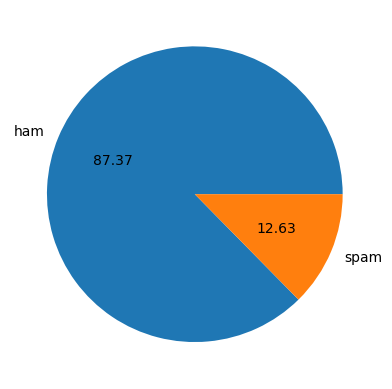

In [117]:
# Making a piechart to see the value count
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

We can see here that the data is imbalanced.

In [118]:
# For a deeper understanding of data , we will create 3 new coloumns
# 1. No. of characters in the sms
# 2. No. of words in the sms
# 3. No. of sentences in the sms.

# We will use the Natural Language Toolkit library for it.
!pip install nltk

In [119]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Abhishek
[nltk_data]     Godiyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Abhishek
[nltk_data]     Godiyal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [120]:
#Getting the number of characters in each sms
df['num_characters'] = df['text'].apply(len)

In [121]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [124]:
#Getting the number of words in each sms
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

We are getting the words in each sms , for the no. of words simply use len function.

In [126]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [127]:
# Getting the number of sentences in each sms.
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

We are getting the sentences in each sms , for the no. of sentences simply use len function.

In [129]:
df['num_sentences'] =  df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
